In [31]:
%%HTML
<link rel="stylesheet" type="text/css" href="style.css">

<h2>Alessio Nicodemo, Matricola : 166972</h2>
<h1><strong>Fondamenti Di Scienza Dei Dati E Laboratorio</stromg></h1>
<h3>Modulo: <strong >Presentazone del Progetto</strong></h3>  
<h3>Titolo: <strong style = "color : #FFA500";> Crimini Denunciati in Italia </strong></h3>


<h2><strong>1. Fondamenti del progetto</strong></h2>

<h3><strong>Motivazione della scelta</strong></h3>
<ul>
  <li>Interesse personale</li>
  <li>Rilevanza e attualità del tema</li>
</ul>

<h3><strong>Oggetto dello studio</strong></h3>
<ul>
  <li>L'evoluzione negli anni</li>
  <li>Reati più comuni</li>
  <li>Distribuzione geografica</li>
  <li>Relazioni</li>
</ul>

<h2><strong>2. Descrizione dei dati</strong></h2>

<h3><strong>Raccolta</strong></h3>

<a href="https://ucs.interno.gov.it/ucs/contenuti/Numero_dei_delitti_denunciati_all_autorit_agrave_giudiziaria_dalle_forze_di_polizia_int_00062-7730889.htm" target="_blank">
<img src="image/MinisteroInterno.svg" alt="Logo Ministero dell'Interno" style="height: 80px; vertical-align: middle;">
</a>
<br>
<br>
<p> Dati sui crimini denunciati a livello regionale e provinciale dal 2016 al 2023, comprendendo:</p>
<ul>
        <li>Numero di denunce</li>
        <li>Tipologia di reato</li>
        <li>Luogo di avvenimento</li>
</ul>

<a href="https://esploradati.istat.it/databrowser/#/" target="_blank">
<img src="image/istat.png" alt="Logo Istat" style="height: 90px; vertical-align: middle;">
</a>
<br>
<br>
<p> Dati sulla popolazione a livello provinciale nel 2022, includendo:</p>
<ul>
        <li>Numero di residenti in Italia censiti al 1° gennaio</li>
        <li>Reddito medio pro capite (in euro)</li>
        <li>Tasso di disoccupazione (15 - 64 anni)</li>
</ul>

<a href="https://gadm.org/maps/ITA.html" target="_blank">
<h3>
  <strong style="color: #F8C471;">GADM maps and data</strong>
  <img src="image/gadm.png" alt="Logo GADM" style="height: 90px; vertical-align: middle; margin-left: 10px;">
</h3>
</a>

<br>
<p>Spatial data dell'Italia a livello regionale.</p>

<h3><strong>Organizzazione</strong></h3>

<p>I dataset scaricati sono stati rielaborati in fogli di calcolo,  per affrontare i seguenti problemi:</p>
<ul>
  <li>Mancanza di dati (senza compromettere il progetto)</li>
  <li>Malgestione delle righe e delle colonne</li>
  <li>Spazi nei titoli delle colonne</li>
</ul>

<p>sono reperibili online alla pagina di Github @AlessioNicodemo </p>

<h2><strong>3. Analisi</strong></h2>

<h3><strong>Domande</strong></h3>
<p>L'analisi è basata sui dati del 2022, eccetto dove diversamente indicato:</p>
<ul>
    <li><strong>3.1 Quale tipologia di crimine presenta una variazione più significativa tra il 2016 e il 2023?<strong></li>
    <ul>
            <li>Quali crimini all'interno della categoria hanno registrato questo cambiamento?</li>
    </ul>
    <li><strong>3.2 Dove vengono denunciati più reati a livello regionale?<strong></li>
    <ul>
            <li>Nel dettaglio, i crimini più comuni e di che categoria fanno parte?</li>
    </ul>
    <li><strong>3.3 Quali correlazioni ci sono con il numero di delitti denunciati a livello provinciale?<strong></li>
    <ul>
            <li>Popolazione?</li>
            <li>Fattori economici, tasso di disoccupazione e il reddito medio pro capite?</li>
    </ul>
</ul>

<h2><strong>3.1  Andamento dei Crimini (2016-2023)</strong></h2>

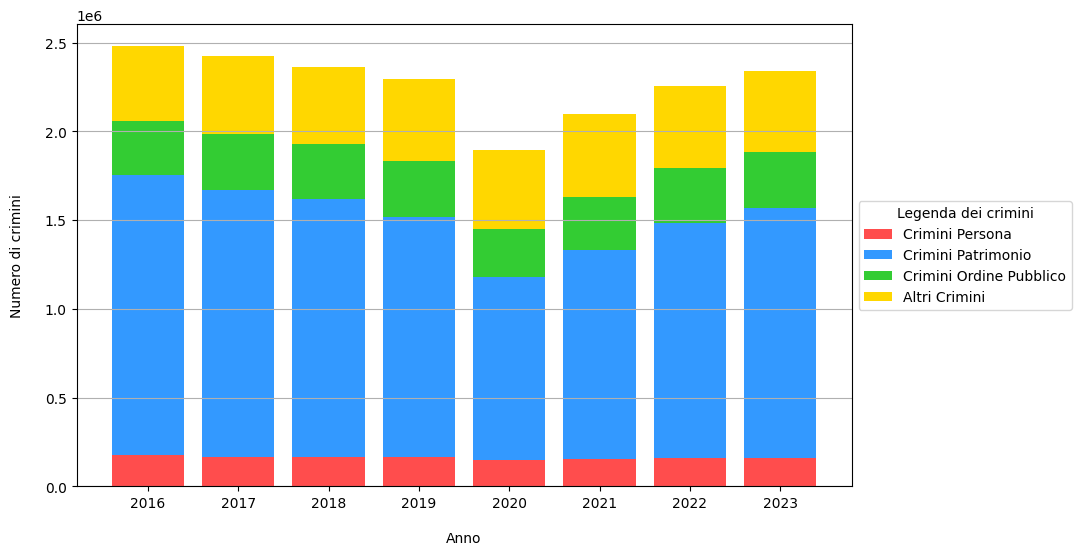

In [1]:
# importo le librerie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# lista degli anni 
anni = list(range(2016, 2024))

# lista vuota per contenere i DataFrame di ogni anno
df_list = []

# ciclo per leggere e processare gli Excel per ogni anno
for anno in anni:
    # costruisce il percorso del file in base all'anno
    file_path = f'Dataset/DelittiDenunciati_{anno}.xlsx'
    
    # legge il file Excel, foglio 'DenunceStato'
    df = pd.read_excel(file_path, 'DenunceStato')
    
    # rimuove le righe o colonne che contengono valori mancanti (NaN)
    df.dropna(inplace = True)
    
    # nuova colonna 'ANNO' per identificare l'anno nel DataFrame
    df['ANNO'] = anno
    
    # converte le colonne prese dal dataset in interi
    df['Crimini Persona'] = df['Crimini contro la persona'].astype(int)
    df['Crimini Patrimonio'] = df['Crimini contro il patrimonio'].astype(int)
    df['Crimini Ordine Pubblico'] = df['Crimini contro ordine pubblico e sicurezza'].astype(int)
    df['Altri Crimini'] = df['Altri Crimini'].astype(int)
    
    # aggiunge il DataFrame processato alla lista
    df_list.append(df[['ANNO', 'Crimini Persona', 'Crimini Patrimonio', 'Crimini Ordine Pubblico', 'Altri Crimini']])

# unione di tutti i DataFrame in un unico DataFrame
df_unito = pd.concat(df_list, ignore_index = True)

# crea il grafico a barre sovrapposte
plt.figure(figsize = (10, 6))

# inizializza la base per le barre sovrapposte
bottom = np.zeros(len(anni))

# categorie di crimini e rispettivi colori
categorie_crimini = ['Crimini Persona', 'Crimini Patrimonio', 'Crimini Ordine Pubblico',  'Altri Crimini']
colori = ['#ff4d4d', '#3399ff', '#33cc33', '#ffd700']

# loop per ogni categoria di crimine
for i, categoria in enumerate(categorie_crimini):
    plt.bar(df_unito['ANNO'], df_unito[categoria], bottom = bottom, label = categoria, color = colori[i])
    bottom += df_unito[categoria]

# titolo e etichette agli assi
plt.xlabel('Anno', labelpad = 15)
plt.ylabel('Numero di crimini', labelpad = 15)

# aggiunge la legenda a destra
plt.legend(title = 'Legenda dei crimini', loc = 'center left', bbox_to_anchor = (1, 0.5))

# griglia per rendere più leggibile il grafico
plt.grid(True, axis = 'y')

# mostra il grafico
plt.show()

<h2><strong>Crimini contro il Patrimonio (2016 e 2020)</strong></h2>

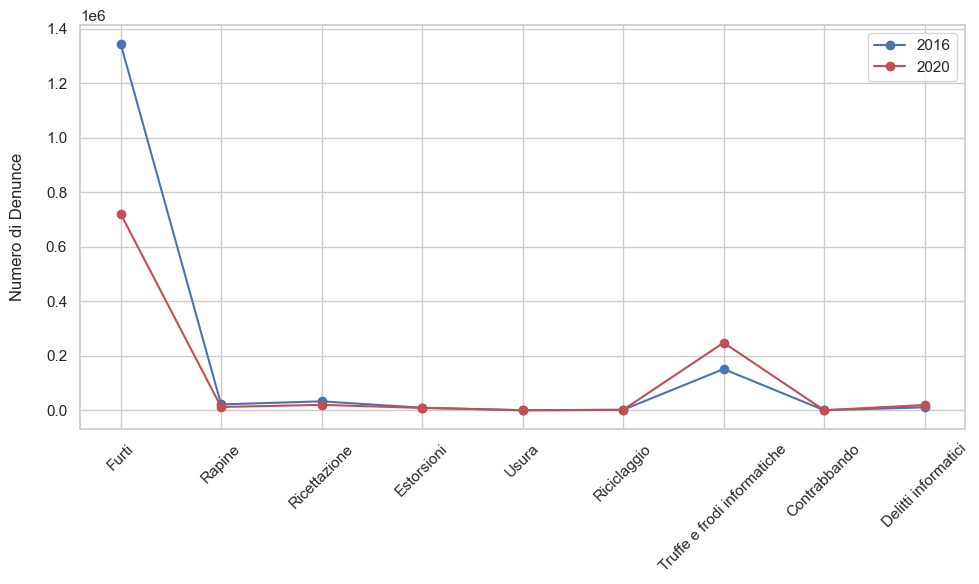

In [4]:
# importo le librerie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# legge i file Excel, foglio 'LegendaCriminiStato', crimini contro il patrimonio
df_delitti_2016 = pd.read_excel('Dataset/DelittiDenunciati_2016.xlsx', 'LegendaCriminiStato', skiprows=21, usecols="AB, AN, AO, AY, AZ, BF, BG, BL, BW")
df_delitti_2020 = pd.read_excel('Dataset/DelittiDenunciati_2020.xlsx', 'LegendaCriminiStato', skiprows=21, usecols="AB, AN, AO, AY, AZ, BF, BG, BL, BW")

# rimuove le righe con valori mancanti (NaN)
df_delitti_2016.dropna(inplace=True)
df_delitti_2020.dropna(inplace=True)

# aggiunge una colonna per indicare l'anno nei rispettivi DataFrame
df_delitti_2016['Anno'] = 2016
df_delitti_2020['Anno'] = 2020

# rinomina le colonne in modo che siano coerenti tra i due DataFrame
df_delitti_2016.columns = ['Furti', 'Rapine', 'Ricettazione', 'Estorsioni', 'Usura', 'Riciclaggio', 'Truffe e frodi informatiche', 'Contrabbando', 'Delitti informatici', 'Anno']
df_delitti_2020.columns = ['Furti', 'Rapine', 'Ricettazione', 'Estorsioni', 'Usura', 'Riciclaggio', 'Truffe e frodi informatiche', 'Contrabbando', 'Delitti informatici', 'Anno']

# unione dei due DataFrame mantenendo separati i dati dei due anni
df_confronto = pd.concat([df_delitti_2016, df_delitti_2020])

# imposta la lista dei crimini per l'asse X
crimini = ['Furti', 'Rapine', 'Ricettazione', 'Estorsioni', 'Usura', 'Riciclaggio', 'Truffe e frodi informatiche', 'Contrabbando', 'Delitti informatici']

# imposta il tema di Seaborn
sns.set(style = "whitegrid")

# crea il grafico
plt.figure(figsize = (10,6))

# crea una linea per il 2016
plt.plot(crimini, df_delitti_2016.iloc[0, :-1], label = '2016', marker = 'o', color = 'b')

# crea una linea per il 2020
plt.plot(crimini, df_delitti_2020.iloc[0, :-1], label = '2020', marker = 'o', color = 'r')

# aggiunge titolo e etichette
plt.ylabel('Numero di Denunce', labelpad = 15)
plt.xticks(rotation = 45)  # ruota i nomi dei crimini 
plt.legend()

# mostra il grafico
plt.tight_layout()
plt.show()

<h2><strong>3.2 Distribuzione dei Reati per regione</strong></h2>

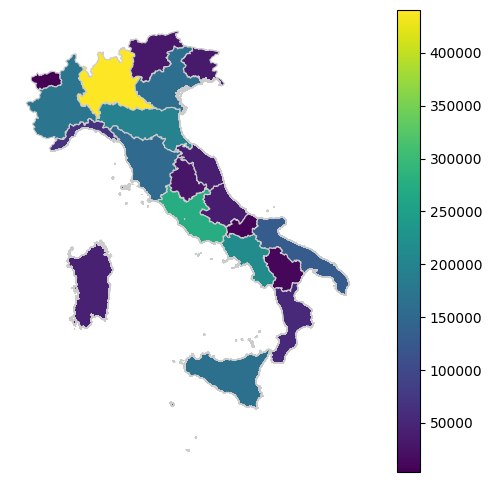

In [1]:
# importo le librerie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# legge il file Excel, contenente i dati dei delitti denunciati per regione, saltando le colonne e righe che non servono
delitti = pd.read_excel('Dataset/DelittiDenunciati_2022.xlsx', 'DenunceRegionali', skiprows = 21, usecols = "A, AN")

# carica il file shapefile delle regioni italiane
shapefile_regioni = gpd.read_file('Italy_shapefile/gadm41_ITA_1.shp')

# corregge i nomi delle regioni nel shapefile per farli corrispondere ai nomi nel DataFrame
shapefile_regioni['NAME_1'] = shapefile_regioni['NAME_1'].replace({
    'Apulia': 'Puglia',  
    'Sicily': 'Sicilia'
})

# rinomina la colonna 'NAME_1' in 'Regione' per allineare i nomi delle regioni tra shapefile e dataset dei delitti
shapefile_regioni.rename(columns={'NAME_1': 'Regione'}, inplace = True)

# trasforma i nomi delle regioni del shapefile in maiuscolo per una corretta corrispondenza
shapefile_regioni['Regione'] = shapefile_regioni['Regione'].apply(lambda x: x.upper())

# modifica i nomi delle regioni nel dataset dei delitti (rimuovendo eventuali spazi o caratteri extra)
delitti['Regione'] = delitti['Regione'].apply(lambda x: x.upper())  # Rimuove i caratteri finali extra

# unisce il GeoDataFrame con il DataFrame basandosi sulla colonna 'Regione'
dfshape = shapefile_regioni.merge(delitti, left_on = 'Regione', right_on = 'Regione')

# imposta la figura e l'asse per visualizzare la mappa
fig, ax = plt.subplots(1, 1, figsize = (8, 6))

# crea la mappa 
dfshape.plot(column = 'Totale',  # colonna che rappresenta i delitti totali per regione
             linewidth = 0.8,  # spessore del contorno delle regioni
             ax = ax,  # asse su cui disegnare la mappa
             edgecolor = '0.8',  # colore dei bordi delle regioni
             legend = True)  # aggiuge legenda

# rimuove la griglia dall'asse
ax.grid(False)
ax.set_axis_off()

# mostra la mappa
plt.show()

<h2><strong>Reati più comuni in Lombardia</strong></h2>

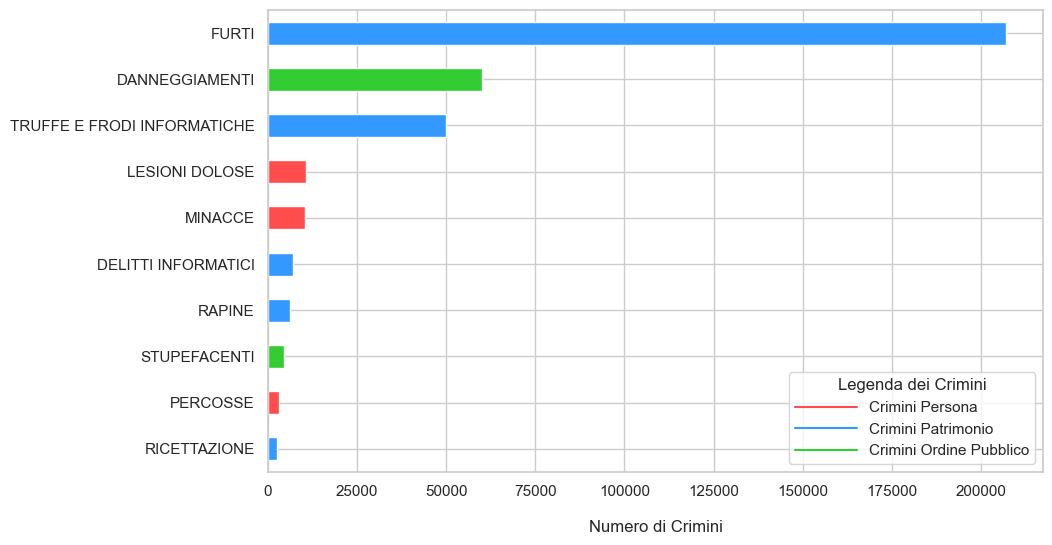

In [2]:
# importo le librerie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# legge il file Excel, foglio 'DenunceRegionali' saltando le note
df_delitti = pd.read_excel('Dataset/DelittiDenunciati_2022.xlsx', 'DenunceRegionali', skiprows = 21)

# filtra i dati per la regione Lombardia
df_lombardia = df_delitti[df_delitti['Regione'] == 'Lombardia']

# rimuove le colonne da escludere dal DataFrame 
colonne_da_escludere = ['Persona', 'Patrimonio', 'Pubblico', 'Altro', 'Totale', 'ALTRI DELITTI']
df_crimini_lombardia = df_lombardia.drop(columns = colonne_da_escludere)

# converte i valori delle colonne in numerici, forzando i non numerici a NaN
df_crimini_lombardia = df_crimini_lombardia.apply(pd.to_numeric, errors = 'coerce')
# riempie i valori NaN con 0
df_crimini_lombardia.fillna(0, inplace = True)

# somma i crimini in ogni colonna
sums_lombardia = df_crimini_lombardia.sum()

# ordina i crimini dal maggiore al minore
sums_lombardia_sorted = sums_lombardia.sort_values(ascending = False)

# mostra solo i primi 10 crimini
sums_lombardia_comuni = sums_lombardia_sorted.head(10)

# crea una mappatura per i colori dei crimini specifici
color_map = {
    'furti': '#3399ff',           
    'danneggiamenti': '#33cc33',      
    'truffe e frodi informatiche': '#3399ff', 
    'lesioni dolose': '#ff4d4d',      
    'minacce': '#ff4d4d',             
    'delitti informatici': '#3399ff', 
    'rapine': '#3399ff',              
    'stupefacenti': '#33cc33',       
    'percosse': '#ff4d4d',            
    'ricettazione': '#3399ff'         
}

# applica i colori ai crimini, se non lo trova gli mette un colore standard
colori_comuni = [color_map.get(crimine.lower(), '#ffd700') for crimine in sums_lombardia_comuni.index]

# imposta il tema di Seaborn
sns.set(style = "whitegrid")

# crea il grafico a barre orizzontali con i colori specifici e mette prima i crimini grandi
plt.figure(figsize = (10, 6))
sums_lombardia_comuni.plot(kind = 'barh', color = colori_comuni)

# inverte l'asse Y per mostrare i crimini maggiori in alto
plt.gca().invert_yaxis()

# aggiunge titolo e etichette agli assi
plt.xlabel('Numero di Crimini', labelpad = 15)

# aggiunge la leggenda
legend_labels = ['Crimini Persona', 'Crimini Patrimonio', 'Crimini Ordine Pubblico']
legend_colors = ['#ff4d4d', '#3399ff', '#33cc33']
for label, color in zip(legend_labels, legend_colors):
    plt.plot([], [], color = color, label = label)

# modifica la grandezza dei colori nella legenda
plt.legend(title = 'Legenda dei Crimini', handlelength = 4) 

# mostra il grafico
plt.show()

<h2><strong>3.3 Correlazione tra Delitti e Popolazione</strong></h2>

<p>Il grafico ha un margine di errore causato da capoluoghi con popolazione maggiore</p>

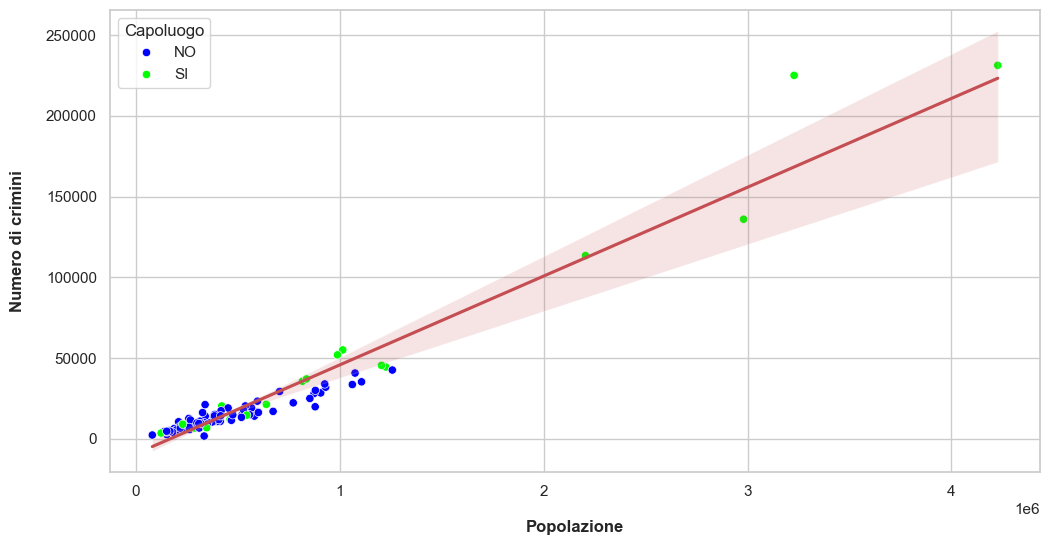

In [7]:
# importo le librerie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# carica i dati per le regioni e le province
df_popolazione = pd.read_excel('Dataset/PopolazioneItalia_2022.xlsx', 'PopolazioneProvinciale')
    
# legge il file Excel, foglio 'DenunceStato'
df_delitti = pd.read_excel('Dataset/DelittiDenunciati_2022.xlsx', 'DenunceProvinciali')
    
# rimuove le righe o colonne che contengono valori mancanti (NaN)
df_popolazione.dropna(inplace = True)
df_delitti.dropna(inplace = True)

# unisce i due dataframe 
df_province = pd.merge(df_popolazione, df_delitti)

# imposta il tema di Seaborn
sns.set(style = "whitegrid")

# --- Primo grafico con margine di errore ---
plt.figure(figsize = (12, 6))

# palette per capoluoghi / province
palette = {'SI': '#00FF00', 'NO': '#0000FF'}

# grafico di dispersione con distinzione di capoluogo
sns.scatterplot(x = 'Totale Popolazione', 
                y = 'Totale Generale Delitti', 
                data = df_province, 
                hue = 'Capoluogo', 
                palette = palette, 
                marker = 'o')

# aggiunge una linea di regressione con margine di errore (ci = Confidence Interval)
sns.regplot(x = 'Totale Popolazione', 
            y = 'Totale Generale Delitti', 
            data = df_province, 
            scatter = False, 
            color = 'r', 
            ci = 95)

# nomi degli assi e titolo
plt.xlabel('Popolazione', labelpad = 15, fontweight = 'bold')
plt.ylabel('Numero di crimini', labelpad = 15, fontweight = 'bold')
plt.grid(True)

# aggiunta della legenda
plt.legend(title = 'Capoluogo', fontsize = 11, title_fontsize = '12', loc = 'upper left')
plt.show()

<p style="color: green; font-weight: bold;"> Coefficiente di Pearson : 0.9679339865047006, P-value : 3.229564867010509e-64 </p>

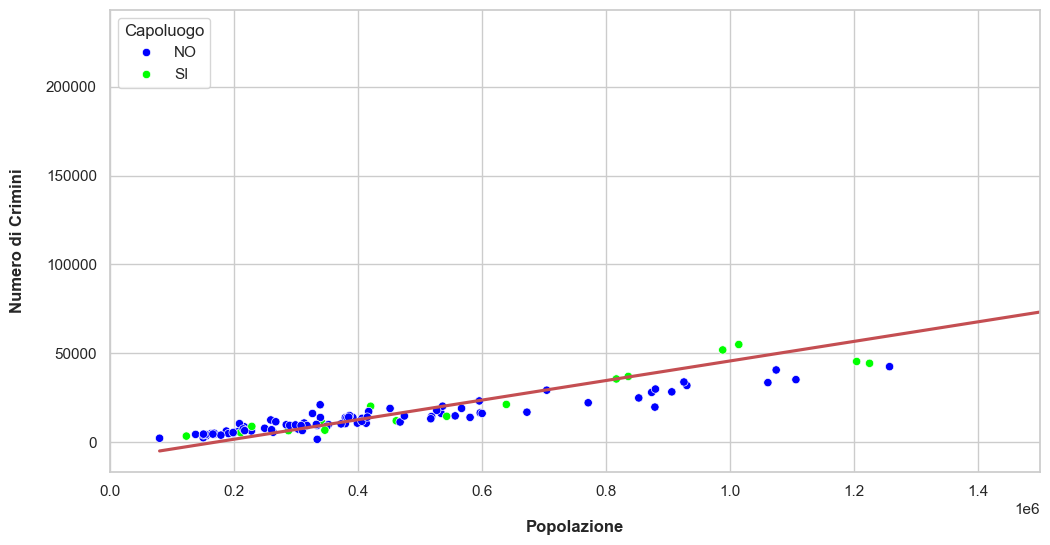

In [5]:
# --- Secondo grafico senza margine di errore ---
plt.figure(figsize = (12, 6))

# palette per capoluoghi / province
palette = {'SI': '#00FF00', 'NO': '#0000FF'} 

# grafico di dispersione con distinzione di capoluogo, senza margine di errore
sns.scatterplot(x = 'Totale Popolazione', 
                y = 'Totale Generale Delitti', 
                data = df_province, 
                hue = 'Capoluogo', 
                palette = palette, 
                marker = 'o')

# linea di regressione senza margine di errore
sns.regplot(x = 'Totale Popolazione', 
            y = 'Totale Generale Delitti', 
            data = df_province, 
            scatter = False, 
            color = 'r', 
            ci = None)  # rimuove margine di errore

# limiti asse X e griglia
plt.xlim(0, 1500000)
plt.xlabel('Popolazione', fontweight = 'bold', labelpad = 15)
plt.ylabel('Numero di Crimini', fontweight = 'bold', labelpad = 15)
plt.grid(True)

# aggiunta della legenda
plt.legend(title = 'Capoluogo', fontsize = 11, title_fontsize = '12', loc = 'upper left')
plt.show()

<h2><strong>3.3 Correlazione tra Delitti e Fattori Economici</strong></h2>
<ul>
        <li style="color: green; font-weight: bold;">Coefficiente di Pearson : 0.4124964849546167, P-value : 1.1136113732549676e-05</li>
        <li style="color: red; font-weight: bold;">Coefficiente di Pearson : 0.024748612906938458, P-value : 0.8011802320642667</li>
</ul>

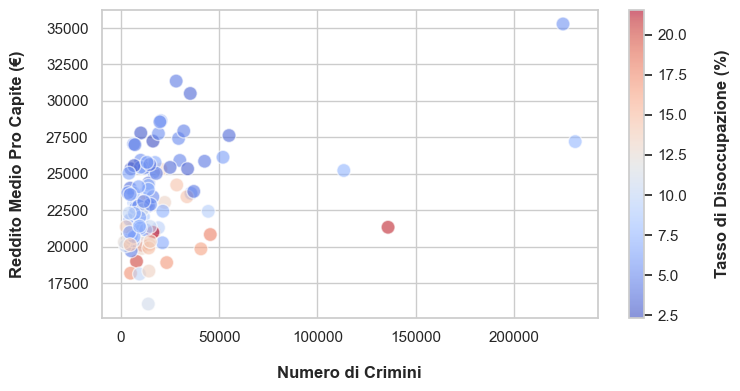

In [5]:
# importo le librerie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# carica i dati per le regioni e le province
df_popolazione = pd.read_excel('Dataset/PopolazioneItalia_2022.xlsx', 'PopolazioneProvinciale')
    
# legge il file Excel, foglio 'DenunceStato'
df_delitti = pd.read_excel('Dataset/DelittiDenunciati_2022.xlsx', 'DenunceProvinciali')
    
# rimuove le righe o colonne che contengono valori mancanti (NaN)
df_popolazione.dropna(inplace = True)
df_delitti.dropna(inplace = True)

# unisce i due dataframe 
df_province = pd.merge(df_popolazione, df_delitti)

# imposta il tema di Seaborn
sns.set(style = "whitegrid")

# crea il grafico a bolle
plt.figure(figsize = (8, 4))
scatter = plt.scatter(
    df_province['Totale Generale Delitti'],  # x
    df_province['Reddito'],  # y
    s = 100,  # dimensione delle bolle
    alpha = 0.6,
    edgecolors = "w",  # colore del bordo delle bolle
    cmap = 'coolwarm',  # colore delle bolle
    c = df_province['Disoccupazione']  # colore in base al tasso di disoccupazione
)

# aggiunge etichette e titolo
plt.xlabel('Numero di Crimini', labelpad = 15, fontweight = 'bold')
plt.ylabel('Reddito Medio Pro Capite (€)', labelpad = 15, fontweight = 'bold')

# aggiunge la barra del colore per il tasso di disoccupazione
cbar = plt.colorbar(scatter)
cbar.set_label('Tasso di Disoccupazione (%)', labelpad = 20, fontweight = 'bold')

# mostra il grafico
plt.show()

In [10]:
# calcolo del coefficiente di correlazione
r, p = stats.pearsonr(df_province['Reddito'], df_province['Totale Generale Delitti'])
print(r, p)

0.4124964849546167 1.1136113732549676e-05


<h2><strong>4. Conclusioni</strong></h2>
<br>
<p> Cosa abbiamo scoperto?</p>
<p>Forte disparità territoriale e economica crea un aumento dei crimini;</p>
<p>Crimini in continua crescita;</p>